#BT1

In [89]:
import numpy as np
from sklearn.svm import SVC
import os
import cv2
from sklearn.metrics import classification_report
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS331.M22.KHCL/Dataset/dogscats_small/

/content/drive/.shortcut-targets-by-id/1-LxRTb0lxd2B3wdzXPBQoDUFkhSsO0dL/CS331.M22.KHCL/Dataset/dogscats_small


In [ ]:
train = "/content/drive/MyDrive/CS331.M22.KHCL/Dataset/dogscats_small/train"
test = "/content/drive/MyDrive/CS331.M22.KHCL/Dataset/dogscats_small/test"

In [ ]:
X_train, y_train, X_test, y_test = [], [], [], []

In [ ]:
for image in os.listdir(train):
  img = cv2.imread(train + '/' + image, 0)
  hist, bins = np.histogram(img, bins = 256)
  X_train.append(hist)
  y_train.append(image[0: 3])

In [ ]:
for image in sorted(os.listdir(test)):
  img = cv2.imread(test + '/' + image, 0)
  hist, bins = np.histogram(img, bins = 256)
  X_test.append(hist)

In [ ]:
y_test = ['cat', 'cat', 'cat', 'dog', 'dog', 
          'cat', 'cat', 'cat', 'dog', 'cat', 
          'cat', 'cat', 'cat', 'dog', 'cat', 
          'cat', 'cat', 'dog', 'dog', 'dog']

#SVM

In [ ]:
clf = SVC(kernel='rbf', random_state=19520008)
clf.fit(X_train, y_train)

SVC(random_state=19520008)

In [ ]:
clf.score(X_test, y_test)

0.55

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cat       0.67      0.62      0.64        13
         dog       0.38      0.43      0.40         7

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.56      0.55      0.56        20



#Bag of Visual Words

In [94]:
from sklearn.svm import SVC
from scipy.cluster.vq import kmeans,vq
from sklearn.metrics import classification_report

In [92]:
orb = cv2.ORB_create()

In [93]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
  for kp in keypoints:
    x, y = kp.pt
    plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

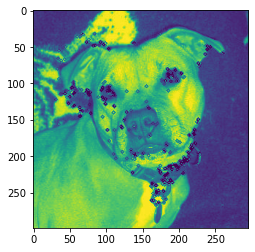

In [95]:
kp = orb.detect(img,None)
kp, des = orb.compute(img, kp)
img=draw_keypoints(img,kp)

In [96]:
list_train = []
y_train = []
for files in os.listdir(train):
    img = cv2.imread(os.path.join(train, files), 0)
    kp = orb.detect(img, None)
    keypoints, decriptor = orb.compute(img, kp)
    list_train.append((files, decriptor))
    y_train.append(files[0: 3])

list_test = []
y_test = []
for files in os.listdir(test):
    img = cv2.imread(os.path.join(test, files), 0)
    kp = orb.detect(img, None)
    keypoints, decriptor = orb.compute(img, kp)
    list_train.append((files, decriptor))

descriptors = list_train[0][1]
for image_path, descriptor in list_train[1:]:
    descriptors=np.vstack((descriptors,descriptor))
  
print(descriptors.shape)
descriptors_ = descriptors.astype(float)

(27762, 32)


In [97]:
for files in os.listdir(test):
    img = cv2.imread(os.path.join(test, files), 0)
    kp = orb.detect(img, None)
    keypoints, decriptor = orb.compute(img, kp)
    list_test.append((files, decriptor))

In [111]:
y_test = ['cat', 'cat', 'cat', 'dog', 'dog', 
          'cat', 'cat', 'cat', 'dog', 'cat', 
          'cat', 'cat', 'cat', 'dog', 'cat', 
          'cat', 'cat', 'dog', 'dog', 'dog']

#Clustering

In [98]:
k = 100
voc, variance = kmeans(descriptors_, k, 1)

In [106]:
img_features=np.zeros((len(os.listdir(train)),k),"float32")
for i in range(len(os.listdir(train))):
    words,distance=vq(list_train[i][1], voc)
    for w in words:
        img_features[i][w]+=1
img_features.shape

(42, 100)

In [107]:
test_features = np.zeros((len(os.listdir(test)),k),"float32")
for i in range(len(os.listdir(test))):
  words, distance=vq(list_test[i][1],voc)
  for w in words:
    test_features[i][w]+=1
test_features.shape

(20, 100)

SVM

In [108]:
clf = SVC(kernel='rbf', probability=True, random_state=19520008)
clf.fit(img_features, y_train)

SVC(probability=True, random_state=19520008)

In [112]:
clf.score(test_features, y_test)

0.5

In [113]:
y_pred = clf.predict(test_features)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cat       0.64      0.54      0.58        13
         dog       0.33      0.43      0.38         7

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.53      0.50      0.51        20

